[0.         0.09517226 0.49551627 ... 2.99861017 2.99873726 2.99970018]


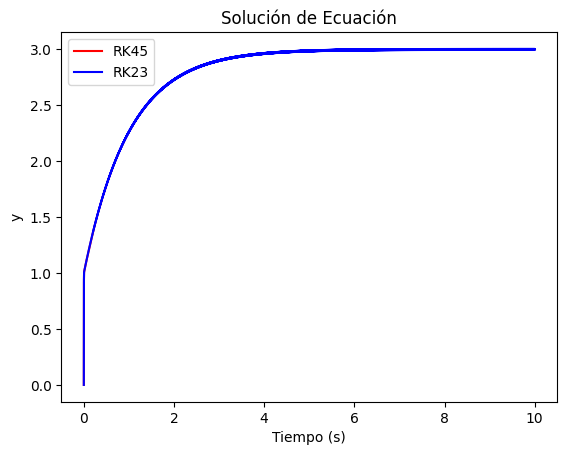

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp


def function(t,y):
    a=-1000*y+3000-2000*np.exp(-t)
    return a

y0 = np.zeros(1)


b = solve_ivp(function,[0,10],[0],"RK45")
c = solve_ivp(function,[0,10],[0],RK23)

print(b.y[0][:])

plt.plot(b.t,b.y[0][:],'r',c.t,c.y[0][:],'b')
plt.xlabel('Tiempo (s)')
plt.ylabel('y')
plt.title('Solución de Ecuación')
plt.legend(['RK45','RK23'])



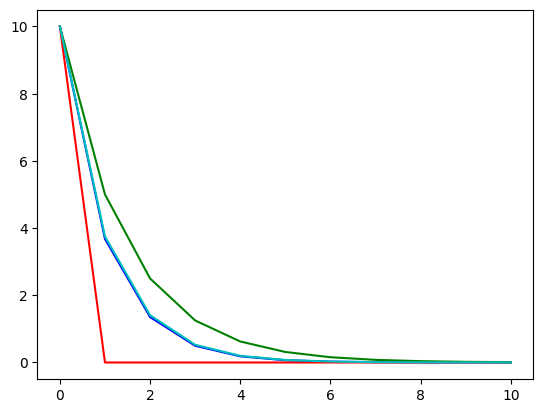

In [56]:
# Solución de RC con euler
# Librerias a utilizar:
import numpy as np
import matplotlib.pyplot as plt

R = 1000;
C = 1e-3;

# Ecuación diferencial:
def fRC(t,v):
    f=-1/(R*C)*v
    return(f)

# paso de integración
h = 1;
tfin = 10;
# Cantidad de pasos
n = int((tfin/h)+1)

# inicializando variables que almacenan informacion
t = np.zeros(n)
v1 = np.zeros(n)

# condición inicial
v0 = 10
v1[0] = v0

# proceso iterativo - Euler
for i in np.arange(1,n):
    v1[i] = v1[i-1] + h * fRC(t[i-1],v1[i-1])
    t[i] = t[i-1] + h

# Dato real
v_real = v0 * np.exp(-t/(R*C))



v2 = np.zeros(n)
v2[0] = v0

# proceso iterativo - Heun
for i in np.arange(1,n):
    mi = fRC(t[i-1],v2[i-1])
    vtemp = v2[i-1] + h * mi
    mi1 = fRC(t[i],vtemp)

    v2[i] = v2[i-1] + h * (mi+mi1)/2


# Runge Kutta  

v3 = np.zeros(n)

v3[0] = v0

for i in np.arange(1,n):
    k1 = fRC(t[i-1],v3[i-1])

    ttemp = t[i-1]+1/2*h
    vtemp = v3[i-1]+1/2*h*k1
    k2 = fRC(ttemp,vtemp)

    ttemp = t[i-1]+1/2*h
    vtemp = v3[i-1]+1/2*h*k2
    k3 = fRC(ttemp,vtemp)

    ttemp = t[i-1] + h
    vtemp = v3[i-1]+h*k3
    k4 = fRC(ttemp,vtemp)

    v3[i] = v3[i-1] + 1/6 * h * (k1 + 2*k2 + 2*k3 + k4)
    
plt.plot(t,v_real,'b',t,v1,'r',t,v2,'g',t,v3,'c')

In [61]:
t=np.arange(0,10,0.3)

print(t)

[0.  0.3 0.6 0.9 1.2 1.5 1.8 2.1 2.4 2.7 3.  3.3 3.6 3.9 4.2 4.5 4.8 5.1
 5.4 5.7 6.  6.3 6.6 6.9 7.2 7.5 7.8 8.1 8.4 8.7 9.  9.3 9.6 9.9]


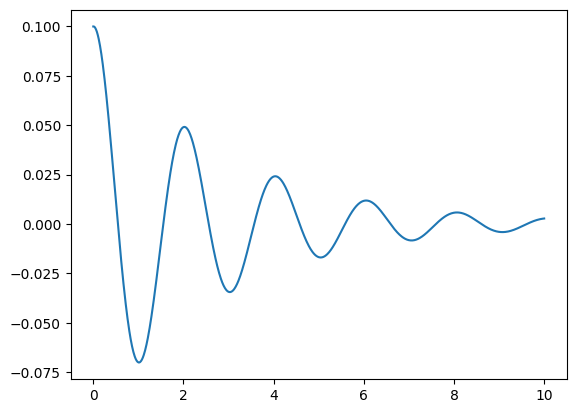

In [95]:
# Solucion de pendulo
def f(t,x):
    g=9.81;
    l=1;
    m=2.5;
    b=2;
    n = np.size(x)
    sal = np.zeros(n)

    sal[0] = x[1]
    sal[1] = -g/l*np.sin(x[0])-b/m*x[1]
    return sal

# Definicion de condiciones iniciales:
th0 = 0.1
w0 = 0


# Discretización de variable tiempo
h = 0.01
tfin = 10
n = int(tfin/h+1)


# Variables a utilizar para almacenar información:
t = np.zeros(n)
x = np.zeros([2,n])


# Condiciones inciales:
x[0][0] = th0
x[1][0] = w0


# Euler
for i in np.arange(1,n):
    m = f(t[i-1],[x[0][i-1],x[1][i-1]])
    x[0][i] = x[0][i-1] + h * m[0]
    x[1][i] = x[1][i-1] + h * m[1]

    t[i] = t[i-1] + h

plt.plot(t,x[0])

    




In [99]:
print(x[0])

[0.1        0.1        0.09990206 ... 0.00272546 0.00275342 0.00277848]
